<a href="https://colab.research.google.com/github/robbiemulkiie/tugaspython/blob/main/tugas14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ntl = lambda x: 10*np.log10(x)
ltn = lambda x: 10**(x/10)

def cos(frekuensi,tp,ht,highreceiver,d):
    if frekuensi in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frekuensi in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tp=='urban' :
        Cm=0
    elif tp=='suburban' :
        Cm= -2*((np.log10((frekuensi/28)**2))-5.4)
    elif tp=='open' :
        Cm= -4.78*(np.log10(frekuensi))+18.33*(np.log10(frekuensi))-40.94
    else :
        Cm='tp salah'
    
    ahighreceiver = (1.1*np.log10(frekuensi)-0.7)*highreceiver-(1.56*np.log10(frekuensi)-1.8)
    Lp = Ca+(Cb*np.log10(frekuensi))-(13.83*np.log(ht))-ahighreceiver+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [4]:
ht = 80
highreceiver = 1.5
dmin=300 
dmax=1000 
N = 200
ptr = 30
gtr = 10
gre = 2
bw = 5000
d=np.random.randint(dmin,dmax,N)

In [5]:
#fungsi daya terima, snr, kapasitas
def pterima(ptr,pl,gtr,gre):
  ptr1 = ntl(ptr)
  daya = ptr - pl + gtr + gre
  daya1 = ltn(daya)
  return daya1

def snr(pterima,bw):
  noise = -174 + 10*np.log10(bw)
  noise1 = ltn(noise)
  snr = pterima/noise1
  return snr

def ks(snr,bw):
  snr1 = ltn(snr)
  ks = bw*np.log2(1+snr1)
  return ks

In [6]:
#daya terima f sama
def pterimaurban():
  f=1800 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  d_sort=d[np.argsort(d)]
  Urban_sort=pterimafix[np.argsort(d)]
  return d_sort,Urban_sort

def pterimaopen():
  f=1800 
  loc='open'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  d_sort=d[np.argsort(d)]
  Urban_sort=pterimafix[np.argsort(d)]
  return d_sort,Urban_sort

def pterimasuburban():
  f=1800 
  loc='suburban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  d_sort=d[np.argsort(d)]
  Urban_sort=pterimafix[np.argsort(d)]
  return d_sort,Urban_sort
  
d11,pl11 = pterimaurban()
d12,pl12 = pterimaopen()
d13,pl13 = pterimasuburban()


#daya terima lokasi sama
def pterima700():
  f=700
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  d_sort=d[np.argsort(d)]
  Urban_sort=pterimafix[np.argsort(d)]
  return d_sort,Urban_sort

def pterima900():
  f=900
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  d_sort=d[np.argsort(d)]
  Urban_sort=pterimafix[np.argsort(d)]
  return d_sort,Urban_sort

def pterima1800():
  f=1800 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  d_sort=d[np.argsort(d)]
  Urban_sort=pterimafix[np.argsort(d)]
  return d_sort,Urban_sort

d21,pl21 = pterima700()
d22,pl22 = pterima900()
d23,pl23 = pterima1800()

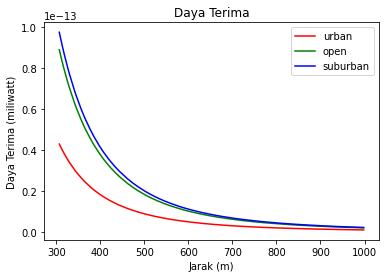

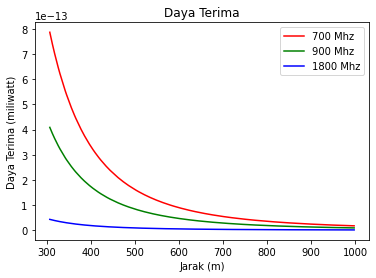

In [7]:
plt.figure()
plt.plot(d11,pl11,'r', label='urban')
plt.plot(d12,pl12,'g', label='open')
plt.plot(d13,pl13,'b', label='suburban')
plt.legend()
plt.title('Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliwatt)')
plt.show()

plt.figure()
plt.plot(d21,pl21,'r', label='700 Mhz')
plt.plot(d22,pl22,'g', label='900 Mhz')
plt.plot(d23,pl23,'b', label='1800 Mhz')
plt.legend()
plt.title('Daya Terima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliwatt)')
plt.show()

In [8]:
#signal to noise ratio f sama
def snrurban():
  f=1800 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=snrfix[np.argsort(d)]
  return d_sort,Urban_sort

def snropen():
  f=1800 
  loc='open'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=snrfix[np.argsort(d)]
  return d_sort,Urban_sort

def snrsuburban():
  f=1800 
  loc='suburban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=snrfix[np.argsort(d)]
  return d_sort,Urban_sort

d11,pl11 = snrurban()
d12,pl12 = snropen()
d13,pl13 = snrsuburban()


#signal to noise ratio lokasi sama
def snr700():
  f=700 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=snrfix[np.argsort(d)]
  return d_sort,Urban_sort

def snr900():
  f=900 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=snrfix[np.argsort(d)]
  return d_sort,Urban_sort


def snr1800():
  f=1800 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=snrfix[np.argsort(d)]
  return d_sort,Urban_sort

d21,pl21 = snr700()
d22,pl22 = snr900()
d23,pl23 = snr1800()

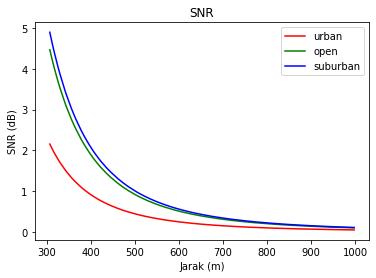

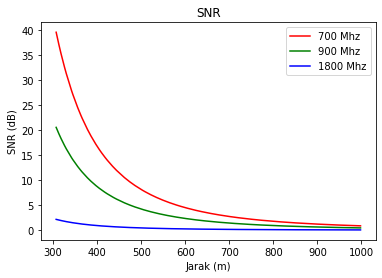

In [9]:
plt.figure()
plt.plot(d11,pl11,'r', label='urban')
plt.plot(d12,pl12,'g', label='open')
plt.plot(d13,pl13,'b', label='suburban')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

plt.figure()
plt.plot(d21,pl21,'r', label='700 Mhz')
plt.plot(d22,pl22,'g', label='900 Mhz')
plt.plot(d23,pl23,'b', label='1800 Mhz')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

In [10]:
#kapasitas seluler f sama
def ksurban():
  f=1800 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  ksfix = ks(snrfix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=ksfix[np.argsort(d)]
  return d_sort,Urban_sort

def ksopen():
  f=1800 
  loc='open'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  ksfix = ks(snrfix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=ksfix[np.argsort(d)]
  return d_sort,Urban_sort

def kssuburban():
  f=1800 
  loc='suburban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  ksfix = ks(snrfix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=ksfix[np.argsort(d)]
  return d_sort,Urban_sort

d11,pl11 = ksurban()
d12,pl12 = ksopen()
d13,pl13 = kssuburban()


#kapasitas seluler lokasi sama
def ks700():
  f=700 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  ksfix = ks(snrfix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=ksfix[np.argsort(d)]
  return d_sort,Urban_sort

def ks900():
  f=900 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  ksfix = ks(snrfix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=ksfix[np.argsort(d)]
  return d_sort,Urban_sort

def ks1800():
  f=1800 
  loc='urban'
  pl=cos(f,loc,ht,highreceiver,d)
  pterimafix = pterima(ptr,pl,gtr,gre)
  snrfix = snr(pterimafix,bw)
  ksfix = ks(snrfix,bw)
  d_sort=d[np.argsort(d)]
  Urban_sort=ksfix[np.argsort(d)]
  return d_sort,Urban_sort

d21,pl21 = ks700()
d22,pl22 = ks900()
d23,pl23 = ks1800()

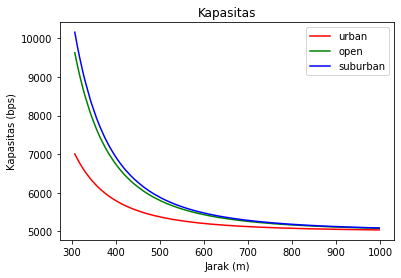

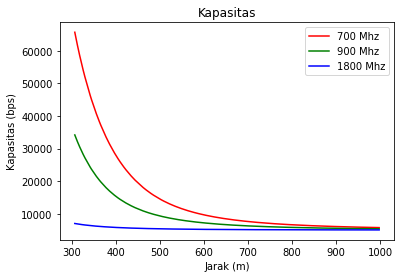

In [11]:
plt.figure()
plt.plot(d11,pl11,'r', label='urban')
plt.plot(d12,pl12,'g', label='open')
plt.plot(d13,pl13,'b', label='suburban')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

plt.figure()
plt.plot(d21,pl21,'r', label='700 Mhz')
plt.plot(d22,pl22,'g', label='900 Mhz')
plt.plot(d23,pl23,'b', label='1800 Mhz')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()